In [ ]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!mkdir ~/.kaggle
!echo '{"username":"xxxxxxxx","key":"xxxxxxxx"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json #only owner has rw access
!pip install kaggle

In [ ]:
!kaggle datasets list -s "Tomato leaf disease detection"

ref                                                                title                                               size  lastUpdated          downloadCount  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
kaustubhb999/tomatoleaf                                            Tomato leaf disease detection                      179MB  2020-04-24 15:18:16           1792  
noulam/tomato                                                      Tomato                                             743MB  2019-07-10 10:48:38           5585  
charuchaudhry/plantvillage-tomato-leaf-dataset                     plantvillage Tomato leaf dataset                   443MB  2019-03-21 20:48:27            921  
olgabelitskaya/tomato-cultivars                                    Tomato Cultivars                                    47MB  2020-07-15 17:42:48            222  
stefanoleone992/rotten-tomat

In [ ]:
!kaggle datasets download -d kaustubhb999/tomatoleaf -p /content/kaggle/

 98% 175M/179M [00:01<00:00, 129MB/s]
100% 179M/179M [00:01<00:00, 132MB/s]


In [ ]:
ls kaggle/

tomatoleaf.zip


In [ ]:
from zipfile import ZipFile
zip = ZipFile('kaggle/tomatoleaf.zip')
zip.extractall('gdrive/MyDrive/tomatoleaf/')

In [ ]:
ls gdrive/MyDrive/tomatoleaf/tomato/

cnn_train.py  train/  val/


In [ ]:
# checking numbers of file in directory
def count_files(in_directory):
    joiner= (in_directory + os.path.sep).__add__
    return sum(
        os.path.isfile(filename)
        for filename
        in map(joiner, os.listdir(in_directory))
    )
count_files("gdrive/MyDrive/tomatoleaf/tomato/val/")
len(os.listdir("gdrive/MyDrive/tomatoleaf/dataset/train/mite/"))

1000

In [ ]:
try: 
    os.mkdir("gdrive/MyDrive/tomatoleaf/dataset")
    os.mkdir("gdrive/MyDrive/tomatoleaf/dataset/train")
    os.mkdir("gdrive/MyDrive/tomatoleaf/dataset/train/healthy")
    os.mkdir("gdrive/MyDrive/tomatoleaf/dataset/train/fungi")
    os.mkdir("gdrive/MyDrive/tomatoleaf/dataset/train/bacteria")
    os.mkdir("gdrive/MyDrive/tomatoleaf/dataset/train/mold")
    os.mkdir("gdrive/MyDrive/tomatoleaf/dataset/train/virus")
    os.mkdir("gdrive/MyDrive/tomatoleaf/dataset/train/mite")
    os.mkdir("gdrive/MyDrive/tomatoleaf/dataset/test")
    os.mkdir("gdrive/MyDrive/tomatoleaf/dataset/test/healthy")
    os.mkdir("gdrive/MyDrive/tomatoleaf/dataset/test/fungi")
    os.mkdir("gdrive/MyDrive/tomatoleaf/dataset/test/bacteria")
    os.mkdir("gdrive/MyDrive/tomatoleaf/dataset/test/mold")
    os.mkdir("gdrive/MyDrive/tomatoleaf/dataset/test/virus")
    os.mkdir("gdrive/MyDrive/tomatoleaf/dataset/test/mite")
except OSError as error: 
    print(error) 

In [ ]:
ls gdrive/MyDrive/tomatoleaf/tomato/val/

 Tomato___Bacterial_spot/   Tomato___Septoria_leaf_spot/
 Tomato___Early_blight/    'Tomato___Spider_mites Two-spotted_spider_mite'/
 Tomato___healthy/          Tomato___Target_Spot/
 Tomato___Late_blight/      Tomato___Tomato_mosaic_virus/
 Tomato___Leaf_Mold/        Tomato___Tomato_Yellow_Leaf_Curl_Virus/


In [ ]:
cp gdrive/MyDrive/tomatoleaf/tomato/train/Tomato___Bacterial_spot/* gdrive/MyDrive/tomatoleaf/dataset/train/bacteria
cp gdrive/MyDrive/tomatoleaf/tomato/train/Tomato___Early_blight/* gdrive/MyDrive/tomatoleaf/dataset/train/fungi/
cp gdrive/MyDrive/tomatoleaf/tomato/train/Tomato___healthy/* gdrive/MyDrive/tomatoleaf/dataset/train/healthy
cp gdrive/MyDrive/tomatoleaf/tomato/train/Tomato___Late_blight/* gdrive/MyDrive/tomatoleaf/dataset/train/mold
cp gdrive/MyDrive/tomatoleaf/tomato/train/Tomato___Leaf_Mold/* gdrive/MyDrive/tomatoleaf/dataset/train/mold/
cp gdrive/MyDrive/tomatoleaf/tomato/train/Tomato___Septoria_leaf_spot/* gdrive/MyDrive/tomatoleaf/dataset/train/fungi/
cp gdrive/MyDrive/tomatoleaf/tomato/train/Tomato___Spider_mites\ Two-spotted_spider_mite/* gdrive/MyDrive/tomatoleaf/dataset/train/mite/
cp gdrive/MyDrive/tomatoleaf/tomato/train/Tomato___Target_Spot/* gdrive/MyDrive/tomatoleaf/dataset/train/fungi/
cp gdrive/MyDrive/tomatoleaf/tomato/train/Tomato___Tomato_mosaic_virus/* gdrive/MyDrive/tomatoleaf/dataset/train/virus/
cp gdrive/MyDrive/tomatoleaf/tomato/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/* gdrive/MyDrive/tomatoleaf/dataset/train/virus/

cp gdrive/MyDrive/tomatoleaf/tomato/val/Tomato___Bacterial_spot/* gdrive/MyDrive/tomatoleaf/dataset/test/bacteria
cp gdrive/MyDrive/tomatoleaf/tomato/val/Tomato___Early_blight/* gdrive/MyDrive/tomatoleaf/dataset/test/fungi/
cp gdrive/MyDrive/tomatoleaf/tomato/val/Tomato___healthy/* gdrive/MyDrive/tomatoleaf/dataset/test/healthy/
cp gdrive/MyDrive/tomatoleaf/tomato/val/Tomato___Late_blight/* gdrive/MyDrive/tomatoleaf/dataset/test/mold/
cp gdrive/MyDrive/tomatoleaf/tomato/val/Tomato___Leaf_Mold/* gdrive/MyDrive/tomatoleaf/dataset/test/mold/
cp gdrive/MyDrive/tomatoleaf/tomato/val/Tomato___Septoria_leaf_spot/* gdrive/MyDrive/tomatoleaf/dataset/test/fungi/
cp gdrive/MyDrive/tomatoleaf/tomato/val/Tomato___Spider_mites\ Two-spotted_spider_mite/* gdrive/MyDrive/tomatoleaf/dataset/test/mite/
cp gdrive/MyDrive/tomatoleaf/tomato/val/Tomato___Target_Spot/* gdrive/MyDrive/tomatoleaf/dataset/test/fungi/
cp gdrive/MyDrive/tomatoleaf/tomato/val/Tomato___Tomato_mosaic_virus/* gdrive/MyDrive/tomatoleaf/dataset/test/virus/
cp gdrive/MyDrive/tomatoleaf/tomato/val/Tomato___Tomato_Yellow_Leaf_Curl_Virus/* gdrive/MyDrive/tomatoleaf/dataset/test/virus/

In [ ]:
#image array
im = cv2.imread('gdrive/MyDrive/tomatoleaf/tomato/train/Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG')
print(type(im))
print(im.shape)

<class 'numpy.ndarray'>
(256, 256, 3)


In [ ]:
default_image_size = tuple((256, 256))
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return image
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [ ]:
with tf.device('/device:GPU:0'):
  trainDIR = "gdrive/MyDrive/tomatoleaf/dataset/train/"
  imgArr, labelArr = [], []
  for diseaseDIR in os.listdir(trainDIR):
    print(trainDIR+diseaseDIR+", converting...")
    #print(diseaseDIR)
    for imageDIR in os.listdir(trainDIR+diseaseDIR):
      #print(imageDIR)
      try:  
          imgArr.append(convert_image_to_array(trainDIR+diseaseDIR+"/"+imageDIR))
          labelArr.append(diseaseDIR)
      except Exception as e:
        print(f"Error : {e}")
    print(trainDIR+diseaseDIR+", completed.")
#print(imgArr[0])
imageTotal = len(imgArr)
print(imageTotal,"images")

gdrive/MyDrive/tomatoleaf/dataset/train/healthy, converting...
gdrive/MyDrive/tomatoleaf/dataset/train/healthy, completed.
gdrive/MyDrive/tomatoleaf/dataset/train/fungi, converting...
gdrive/MyDrive/tomatoleaf/dataset/train/fungi, completed.
gdrive/MyDrive/tomatoleaf/dataset/train/bacteria, converting...
gdrive/MyDrive/tomatoleaf/dataset/train/bacteria, completed.
gdrive/MyDrive/tomatoleaf/dataset/train/mold, converting...
gdrive/MyDrive/tomatoleaf/dataset/train/mold, completed.
gdrive/MyDrive/tomatoleaf/dataset/train/virus, converting...
gdrive/MyDrive/tomatoleaf/dataset/train/virus, completed.
gdrive/MyDrive/tomatoleaf/dataset/train/mite, converting...
gdrive/MyDrive/tomatoleaf/dataset/train/mite, completed.
10004 images


In [ ]:
with tf.device('/device:GPU:0'):
  testDIR = "gdrive/MyDrive/tomatoleaf/dataset/test/"
  imgtArr, labeltArr = [], []
  for diseaseDIR in os.listdir(testDIR):
    print(testDIR+diseaseDIR+", converting...")
    #print(diseaseDIR)
    for imageDIR in os.listdir(testDIR+diseaseDIR):
      #print(imageDIR)
      try:
          imgtArr.append(convert_image_to_array(testDIR+diseaseDIR+"/"+imageDIR))
          labeltArr.append(diseaseDIR)
      except Exception as e:
        print(f"Error : {e}")
    print(testDIR+diseaseDIR+", completed.")
#print(imgArr[0])
imagetTotal = len(imgtArr)
print(imagetTotal,"images")

gdrive/MyDrive/tomatoleaf/dataset/test/healthy, converting...
gdrive/MyDrive/tomatoleaf/dataset/test/healthy, completed.
gdrive/MyDrive/tomatoleaf/dataset/test/fungi, converting...
gdrive/MyDrive/tomatoleaf/dataset/test/fungi, completed.
gdrive/MyDrive/tomatoleaf/dataset/test/bacteria, converting...
gdrive/MyDrive/tomatoleaf/dataset/test/bacteria, completed.
gdrive/MyDrive/tomatoleaf/dataset/test/mold, converting...
gdrive/MyDrive/tomatoleaf/dataset/test/mold, completed.
gdrive/MyDrive/tomatoleaf/dataset/test/virus, converting...
gdrive/MyDrive/tomatoleaf/dataset/test/virus, completed.
gdrive/MyDrive/tomatoleaf/dataset/test/mite, converting...
gdrive/MyDrive/tomatoleaf/dataset/test/mite, completed.
1000 images


In [ ]:
print(type(imgtArr))
print(type(imgArr))
print(type(labelArr))
print(type(labeltArr))

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


In [ ]:
#saving array to file in drive
with tf.device('/device:GPU:0'):
  np.save('gdrive/MyDrive/tomatoleaf/train.npy', imgArr, allow_pickle=True)
  np.save('gdrive/MyDrive/tomatoleaf/test.npy', imgtArr, allow_pickle=True)
  np.save('gdrive/MyDrive/tomatoleaf/trainlabel.npy', labelArr, allow_pickle=True)
  np.save('gdrive/MyDrive/tomatoleaf/testlabel.npy', labeltArr, allow_pickle=True)

In [ ]:
#fetching train and test data
with tf.device('/device:GPU:0'):
  trainimg = np.load('gdrive/MyDrive/tomatoleaf/train.npy', allow_pickle=True)
  testimg = np.load('gdrive/MyDrive/tomatoleaf/test.npy', allow_pickle=True)
  trainlabel = np.load('gdrive/MyDrive/tomatoleaf/trainlabel.npy', allow_pickle=True)
  testlabel = np.load('gdrive/MyDrive/tomatoleaf/testlabel.npy', allow_pickle=True)

In [ ]:
print(type(trainimg))
print(type(trainlabel))
print(trainimg.shape)
print(trainlabel.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(10004, 256, 256, 3)
(10004,)


In [ ]:
print(trainlabel)

['healthy' 'healthy' 'healthy' ... 'mite' 'mite' 'mite']


In [ ]:
np.unique(testlabel)

array(['bacteria', 'fungi', 'healthy', 'mite', 'mold', 'virus'],
      dtype='<U8')

In [ ]:
#Encoding of classes
from sklearn.preprocessing import LabelEncoder
lenc = LabelEncoder()
y = lenc.fit_transform(testlabel)
print(np.unique(y))
lenc.classes_

[0 1 2 3 4 5]


array(['bacteria', 'fungi', 'healthy', 'mite', 'mold', 'virus'],
      dtype='<U8')

In [ ]:
lenc2 = LabelEncoder()
x = lenc2.fit_transform(trainlabel)
print(np.unique(y))
lenc2.classes_

[0 1 2 3 4 5]


array(['bacteria', 'fungi', 'healthy', 'mite', 'mold', 'virus'],
      dtype='<U8')

In [ ]:
#binary class matrix
x = tf.keras.utils.to_categorical(x)
x.shape

(10004, 6)

In [ ]:
y = tf.keras.utils.to_categorical(y)
y.shape

(1000, 6)

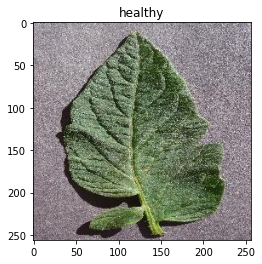

In [ ]:
plt.imshow(cv2.cvtColor(trainimg[2], cv2.COLOR_BGR2RGB))
plt.title(trainlabel[2])
plt.show()

In [ ]:
trainlabel[9050]

'mite'

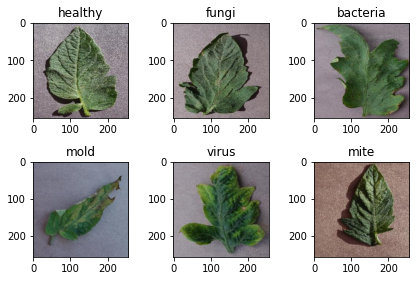

In [ ]:
#images from array with label
rows, cols = 2, 3
plt.subplot(rows, cols, 1)
plt.imshow(cv2.cvtColor(trainimg[2], cv2.COLOR_BGR2RGB))
plt.title(trainlabel[2])
plt.subplot(rows, cols, 2)
plt.imshow(cv2.cvtColor(trainimg[1011], cv2.COLOR_BGR2RGB))
plt.title(trainlabel[1011])
plt.subplot(rows, cols, 3)
plt.imshow(cv2.cvtColor(trainimg[4050], cv2.COLOR_BGR2RGB))
plt.title(trainlabel[4050])
plt.subplot(rows, cols, 4)
plt.imshow(cv2.cvtColor(trainimg[5050], cv2.COLOR_BGR2RGB))
plt.title(trainlabel[5050])
plt.subplot(rows, cols, 5)
plt.imshow(cv2.cvtColor(trainimg[7051], cv2.COLOR_BGR2RGB))
plt.title(trainlabel[7051])
plt.subplot(rows, cols, 6)
plt.imshow(cv2.cvtColor(trainimg[9050], cv2.COLOR_BGR2RGB))
plt.title(trainlabel[9050])
plt.tight_layout()
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense

In [ ]:
model = tf.keras.models.Sequential()
inputShape = (256, 256, 3)
model.add(Conv2D(64, (3,3),input_shape=inputShape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(6, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 256)       0

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=1e-6)
model.compile( loss='categorical_crossentropy',optimizer=adam, metrics=['accuracy'])

In [ ]:
history = model.fit(trainimg, x,epochs=30,batch_size=32, validation_data=(testimg, y))

Epoch 1/30
313/313 [==============================] - 124s 290ms/step - loss: 1.9585 - accuracy: 0.6244 - val_loss: 0.6351 - val_accuracy: 0.7660
Epoch 2/30
313/313 [==============================] - 87s 278ms/step - loss: 0.4799 - accuracy: 0.8175 - val_loss: 0.5276 - val_accuracy: 0.8030
Epoch 3/30
313/313 [==============================] - 87s 278ms/step - loss: 0.3360 - accuracy: 0.8734 - val_loss: 0.4762 - val_accuracy: 0.8290
Epoch 4/30
313/313 [==============================] - 87s 278ms/step - loss: 0.2401 - accuracy: 0.9147 - val_loss: 0.4751 - val_accuracy: 0.8350
Epoch 5/30
313/313 [==============================] - 87s 278ms/step - loss: 0.2017 - accuracy: 0.9283 - val_loss: 0.4983 - val_accuracy: 0.8390
Epoch 6/30
313/313 [==============================] - 87s 278ms/step - loss: 0.1576 - accuracy: 0.9437 - val_loss: 0.3107 - val_accuracy: 0.8870
Epoch 7/30
313/313 [==============================] - 87s 278ms/step - loss: 0.1003 - accuracy: 0.9631 - val_loss: 0.3391 - val_a

In [ ]:
model.save("/content/gdrive/MyDrive/tomatoleaf/model.h5")

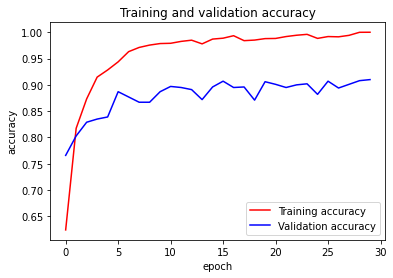

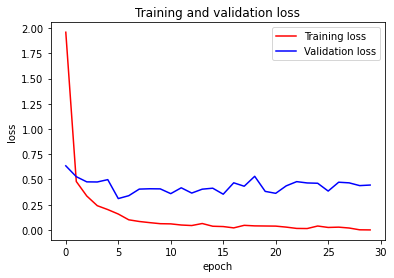

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(testimg, y)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
32/32 [==============================] - 3s 83ms/step - loss: 0.4446 - accuracy: 0.9100
Test Accuracy: 91.00000262260437


In [ ]:
newModel = tf.keras.models.load_model("/content/gdrive/MyDrive/tomatoleaf/model.h5")

In [ ]:
newModel.summary()